In [127]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
r=0.01
miu=np.array([0.06,0.08,0.12])
std=np.diag([0.1,0.2,0.3])
corr=np.array([[1,0.3,0.6],[0.3,1,-0.1],[0.6,-0.1,1]])
corr=(corr+corr.T)/2
cov=np.dot(np.dot(std,corr),std)

In [45]:
objfunc=lambda pw:(np.dot(pw,miu)/np.sum(pw)-r)/np.sqrt(np.dot(pw/np.sum(pw),np.dot(cov,pw/np.sum(pw))))

In [77]:
c1,c2,w=0.25,0.25,0.9

In [120]:
pws=[np.random.rand(50,3)]
srs=[]
pvs=[np.random.rand(50,3)*0.1]
flag=0
gbestsr=[]

for i in range(100):
    sr=np.array(list(map(objfunc,pws[i])))
    srs.append(sr)
    
    if i==0:
        pbest=pws[0]
    else:
        csr=np.array(list(map(objfunc,pws[i])))
        pbestsr=np.array(list(map(objfunc,pbest)))
        pbest[np.where(pbestsr<csr)]=pws[i][np.where(pbestsr<csr)]
    gbest=pbest[np.argmax(list(map(objfunc,pbest)))]
    gbestsr.append(objfunc(gbest))

    
    pwv=w*pvs[i]+np.random.rand(50,3)*c1*(pbest-pws[i])+np.random.rand(50,3)*c2*(gbest-pws[i])
    pw=pws[i]+pwv
    pvs.append(pwv)
    pws.append(pw)

In [124]:
cfbest=np.dot(np.array(np.matrix(cov).I),miu-r)/np.dot(np.array(np.matrix(cov).I),miu-r).sum()
print('PSO:')
print('Optimized weights:',gbest/gbest.sum(),'\n','Optimized PSO:',objfunc(gbest),'\n')
print('Closed form solution:')
print('Optimized weights:',cfbest,'\n','Optimized PSO:',objfunc(cfbest))

PSO:
Optimized weights: [0.55148317 0.29308191 0.15543492] 
 Optimized PSO: 0.5688876485545112 

Closed form solution:
Optimized weights: [0.55150977 0.29307282 0.15541741] 
 Optimized PSO: 0.5688876488081722


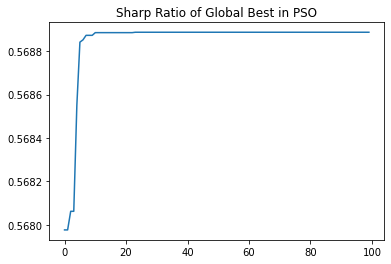

In [126]:
plt.plot(np.arange(len(gbestsr)),gbestsr)
plt.title('Sharp Ratio of Global Best in PSO');

Particle movement through iteration


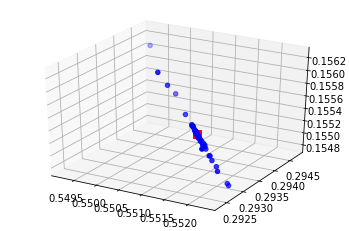

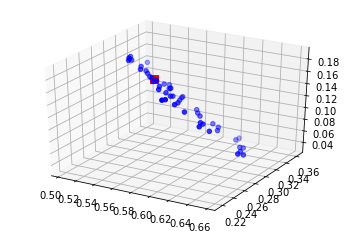

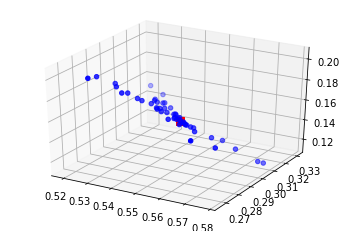

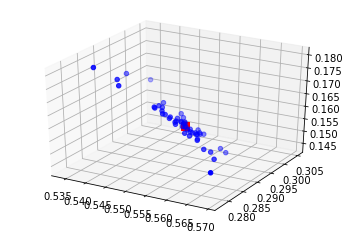

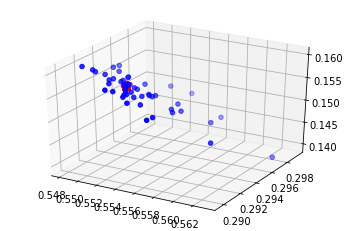

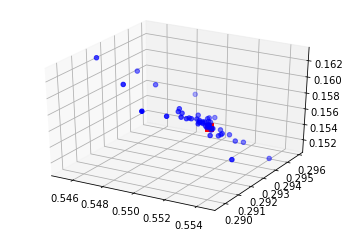

In [137]:
print('Particle movement through iteration')
for i in range(0,101,20):
    x,y,z=pws[i][:,0],pws[i][:,1],pws[i][:,2]
    sumw=sum([x,y,z])
    x,y,z=x/sumw,y/sumw,z/sumw
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(cfbest[0],cfbest[1],cfbest[2],c='r',marker='s',s=80)
    ax.scatter(x, y, z, c='b', marker='o')
    plt.show();